# Pyramids - Limin Ding


# What is Image Pyramid?

 
Image pyramid is constructed by a series of subsampling operations applied to an image sequentially, which captures image information at multiple scales


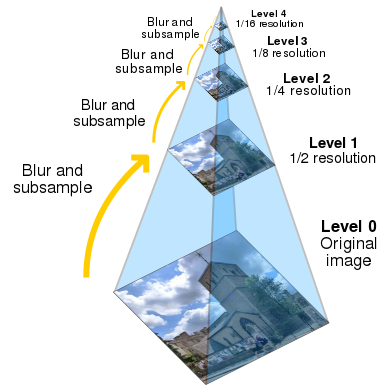 




## Question: 

### What is the issue with directly downsampling an image?



## Answer: 

### It can result in aliasing (pixelation) artifacts.






## Solution: 

### Do smoothing before each downsampling operation

* Using Gaussian kernel for smoothing gives us the Gaussian
pyramid



##Decimation

* Decimation reduces the resolution.
* First convolve the image with the low pass filter to avoid aliasing and then keep every rth sample.





##Interpolation

* When we want to increase an image dimension we are expanding an image and filling in the gaps between the rows and  column of the original image






*   Nearest Neighbor Interpolation
*   Bilinear Interpolation
*   Bicubic Interpolation   

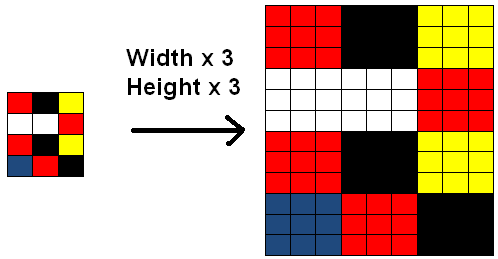


## Nearest Neighbor Interpolation

* So, for each pixel in the output image Y, we must calculate the nearest neighbouring pixel in our source image X. Furthermore, we should only need to rely on 4 specific data points: X(A,B), X(A+1,B), X(A,B+1), and X(A+1,B+1).
* The major drawback to this algorithm is that, despite its speed and simplicity, it tends to generate images of poor quality.

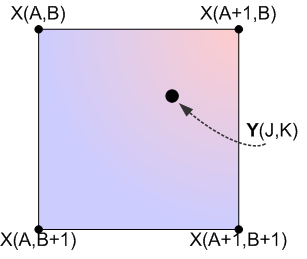

# Bilinear Interpolation


* we are simply creating the new pixel in the target image from a weighted average of its 4 nearest neighbouring pixels in the source image. The weights: h,1-h,w,1-w,are determined by the relative position of the new pixel compared to its neighbours. Also note that these weights represents lines in two dimensions, similar to the 1D example at the top of this page. So, in general, we can interpolate any pixel value to place in the target image as:

Y(J,K) = (1-W)(1-H) X(A,B) +(W)(1-H) X(A+1,B) + (1-W)(H)X(A,B+1) + (W)(H)(A+1)(B+1)
<div style "display: flex; justify-content: center;">
  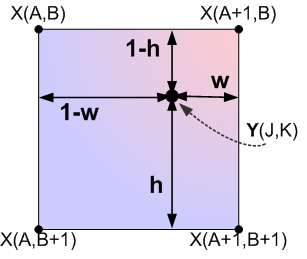


# Interpolation

* Bicubic interpolation is computationally more intensive compared to linear interpolation because it involves more complex mathematical calculations. Therefore, if computational efficiency is a concern, such as in real-time applications or on resource-constrained devices, linear interpolation might be preferred due to its lower computational cost.

* Edge Handling: Bicubic interpolation tends to handle edges better than linear interpolation. It produces smoother transitions between pixels, which can help preserve the sharpness of edges and reduce artifacts such as aliasing. This makes bicubic interpolation more suitable for resizing images with fine details or sharp edges.

**Gaussian Pyramid**

Gaussian Pyramid is the representative method to build a multi-scale representation of an image. It consists of two steps: (1)smoothing to remove high-frequency components that could result aliasing, and (2)down-sampling: reduce the image size by half.

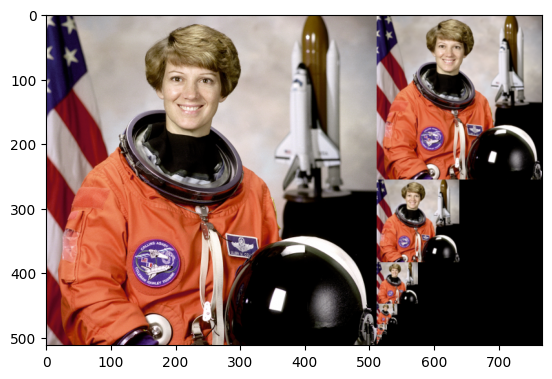

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian


image = data.astronaut()
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, channel_axis=-1))

# determine the total number of rows and columns for the composite
composite_rows = max(rows, sum(p.shape[0] for p in pyramid[1:]))
composite_cols = cols + pyramid[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols, 3),
                           dtype=np.double)

# store the original to the left
composite_image[:rows, :cols, :] = pyramid[0]

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()

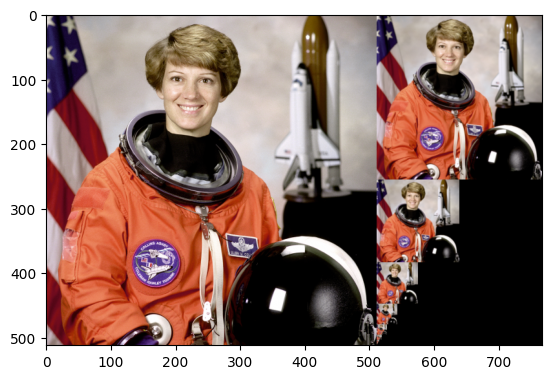

**Laplacian Pyramid**

Laplacian Pyramids are formed from the Gaussian Pyramids. A level in Laplacian Pyramid is formed by the difference between that level in Gaussian Pyramid and expanded version of its upper level in Gaussian Pyramid. A Laplacian pyramid is very similar to a Gaussian pyramid but saves the difference image of the blurred versions between each levels. 



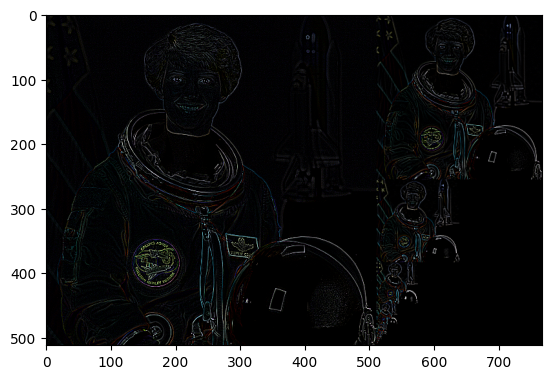

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian, pyramid_laplacian


image = data.astronaut()
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, channel_axis=-1))
laplacian_pyramid = tuple(pyramid_laplacian(image, downscale=2, channel_axis=-1))

# determine the total number of rows and columns for the composite
composite_rows = max(rows, sum(p.shape[0] for p in laplacian_pyramid[1:]))
composite_cols = cols + laplacian_pyramid[1].shape[1]
composite_image = np.zeros((composite_rows, composite_cols, 3),
                           dtype=np.double)

# store the original to the left
composite_image[:rows, :cols, :] = laplacian_pyramid[0] * 5

# stack all downsampled images in a column to the right of the original
i_row = 0
for p in laplacian_pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p * 5
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()


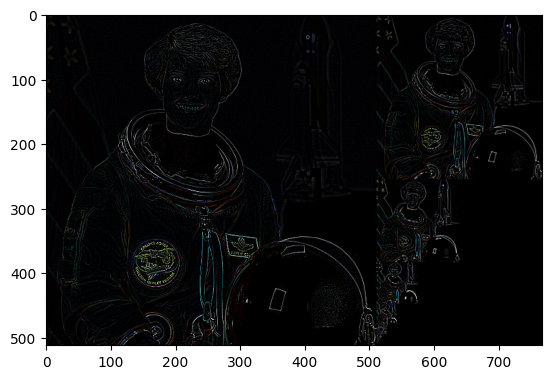

In [ ]:
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
from skimage import io
from scipy.ndimage import gaussian_filter

import scipy as sc
import cv2

from skimage.color import rgb2gray

img1=io.imread('lena.png')
img1 = rgb2gray(img1)
# img2=io.imread('right.jpg')
# img2= rgb2gray(img2)
plt.imshow(img1, cmap=plt.cm.gray)

plt.show()
img1 = img1[0:512, 0:512]
dim = img1.shape
print(dim)
layer1 =gaussian_filter(img1, sigma=1)
plt.imshow(layer1, cmap=plt.cm.gray)
plt.savefig('layer1.jpg')
lap1 = img1 - layer1
plt.figure(5)
plt.imshow(lap1, cmap= plt.cm.gray)
plt.savefig('lap1.jpg')
newDim = (int(layer1.shape[1]/2),int(layer1.shape[0]/2))
img2 =cv2.resize(layer1,newDim , interpolation= cv2.INTER_AREA)
print(img2.shape)
layer2 = gaussian_filter(img2, sigma=1 )
plt.figure(2)
plt.imshow(layer2, cmap=plt.cm.gray)
plt.savefig('layer2.jpg')
lap2 = img2 - layer2
plt.figure(6)
plt.imshow(lap2,cmap=plt.cm.gray)
plt.savefig('lap2.jpg')
img3 = cv2.resize(layer2, (int(layer2.shape[1]/2),int(layer2.shape[0]/2)), interpolation=cv2.INTER_AREA)
print(img3.shape)
layer3= gaussian_filter(img3, sigma = 1)
plt.figure(3)
plt.imshow(layer3, cmap=plt.cm.gray)
plt.savefig('layer3.jpg')
lap3 = img3 - layer3
plt.figure(7)
plt.imshow(lap3,cmap=plt.cm.gray)
plt.savefig('lap3.jpg')
img4 =cv2.resize(layer3, (int(layer3.shape[1]/4),int(layer3.shape[0]/4)), interpolation= cv2.INTER_AREA)
layer4 = gaussian_filter(img4, sigma=1)
print(img4.shape)
plt.figure(4)
plt.imshow(layer4,cmap=plt.cm.gray)
plt.savefig('layer4.jpg')
lap4 = img4 - layer4
plt.figure(8)
plt.imshow(lap4,cmap=plt.cm.gray)
plt.savefig('lap4.jpg')
plt.show()




Image Blending

1. Build Laplacian Pyramid LA and LB from images A and B.
2. Build a Gaussian Pyramid GM from the selected Mask.
3. Form a combine pyramid LS from LA and LB to get using the mask GM as weight.  
* $LS = GM(i,j)*LA(i,j)+(1-GM(i,j))*LB(i,j)$
4. Collapse the LS pyramid to get the final image.



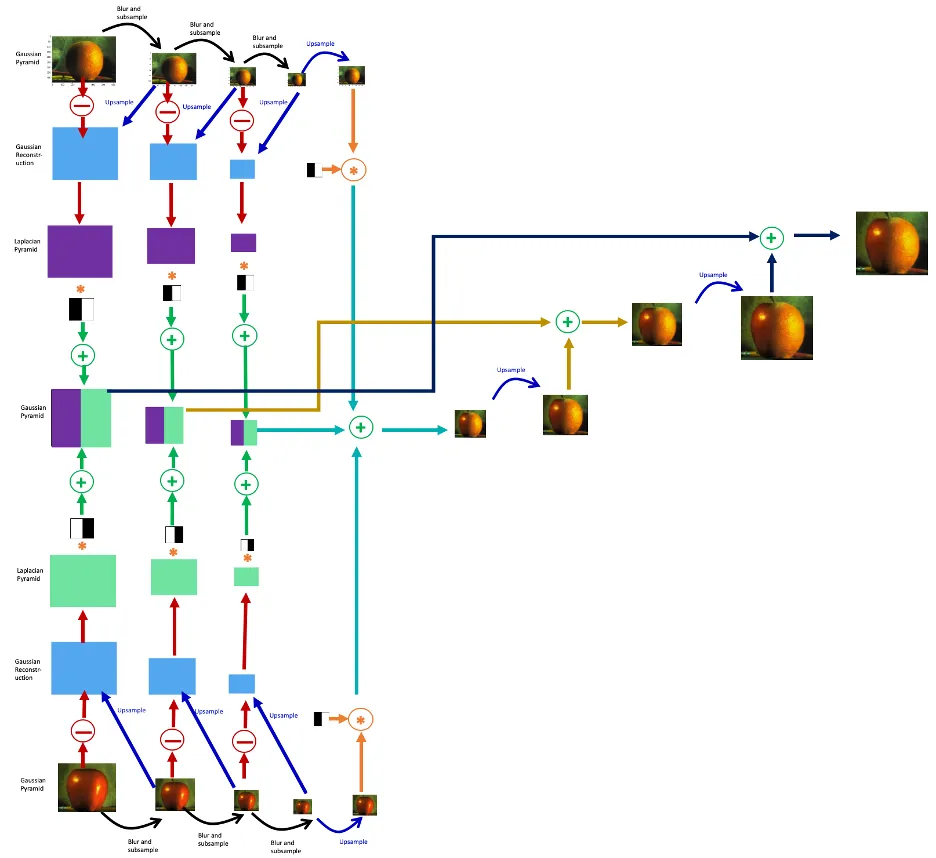

In [2]:

from google.colab import files
uploadImg = files.upload()

ModuleNotFoundError: No module named 'google'

In [1]:
# install the libraries
import numpy as np
import scipy.signal as sig
from scipy import misc
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
import imageio
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
# from google.colab.patches import cv2_imshow

# create a  Binomial (5-tap) filter
kernel = (1.0/256)*np.array([[1, 4, 6, 4, 1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1, 4, 6, 4, 1]])
"""
plt.imshow(kernel)
plt.show()
"""

def interpolate(image):
  """
  Interpolates an image with upsampling rate r=2.
  """
  image_up = np.zeros((2*image.shape[0], 2*image.shape[1]))
  # Upsample
  image_up[::2, ::2] = image
  # Blur (we need to scale this up since the kernel has unit area)
  # (The length and width are both doubled, so the area is quadrupled)
  #return sig.convolve2d(image_up, 4*kernel, 'same')
  return ndimage.filters.convolve(image_up,4*kernel, mode='constant')

def decimate(image):
  """
  Decimates an image with downsampling rate r=2.
  """
  # Blur
  #image_blur = sig.convolve2d(image, kernel, 'same')
  # print(np.shape(image), np.shape(kernel))
  image_blur = ndimage.filters.convolve(image,kernel, mode='constant')
  # Downsample
  return image_blur[::2, ::2]


  # here is the constructions of pyramids
def pyramids(image):
  """
  Constructs Gaussian and Laplacian pyramids.
  Parameters :
  image  : the original image (i.e. base of the pyramid)
  Returns :
  G   : the Gaussian pyramid
  L   : the Laplacian pyramid
  """
  # Initialize pyramids
  G = [image, ]
  L = []

  # Build the Gaussian pyramid to maximum depth
  while image.shape[0] >= 2 and image.shape[1] >= 2:
    image = decimate(image)
    G.append(image)

  # Build the Laplacian pyramid
  for i in range(len(G) - 1):
    L.append(G[i] - interpolate(G[i + 1]))

  return G[:-1], L

# [G, L] = pyramids(image)

# Build Gaussian pyramid and Laplacian pyramids from images A and B, also mask
# Reference: https://becominghuman.ai/image-blending-using-laplacian-pyramids-2f8e9982077f
def pyramidBlending(A, B, mask):
  [GA, LA] = pyramids(A)
  [GB ,LB] = pyramids(B)
  # Build a Gaussian pyramid GR from selected region R (mask that says which pixels come from left and which from right)
  [Gmask, LMask] = pyramids(mask)
  # Form a combined pyramid LS from LA and LB using nodes of GR as weights
  # Equation: LS(i, j) = GR(I, j)*LA(I, j) + (1-GR(I, j)* LB(I, j))
  # Collapse the LS pyramid to get the final blended image
  blend = []
  for i in range(len(LA)):
    # LS = np.max(Gmask[i])*LA[i] + (1-np.max(Gmask[i]))*LB[i]
    # make sure the color with in 255 (white)
    LS = Gmask[i]/255*LA[i] + (1-Gmask[i]/255)*LB[i]
    blend.append(LS)
  return blend

# reconstruct the pyramids as well as upsampling and add up with each level
def reconstruct(pyramid):
  rows, cols = pyramid[0].shape
  res = np.zeros((rows, cols + cols//2), dtype= np.double)
  # start the smallest pyramid so we need to reverse the order
  revPyramid = pyramid[::-1]
  stack = revPyramid[0]
  # start with the second index
  for i in range(1, len(revPyramid)):
    stack = interpolate(stack) + revPyramid[i] # upsampling simultaneously
  return stack

# https://compvisionlab.wordpress.com/2013/05/13/image-blending-using-pyramid/
# Besides pyramid Blending, we need to blend image's color
def colorBlending(img1, img2, mask):
  # split to 3 basic color, then using pyramidBlending and reconstruct it, respectively
  img1R,img1G,img1B = cv2.split(img1)
  img2R,img2G,img2B = cv2.split(img2)
  R = reconstruct(pyramidBlending(img1R, img2R, mask))
  G = reconstruct(pyramidBlending(img1G, img2G, mask))
  B = reconstruct(pyramidBlending(img1B, img2B, mask))
  output = cv2.merge((R, G, B))
  print(output.shape)
  output = output.astype(np.uint8)

  # cv2.imwrite("output.png", output)
  imageio.imsave("output.png", output)

  img = cv2.imread("output.png")
  cv2.imshow("Blend Image",img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()


apple = imageio.imread('grass.jpeg')
orange = imageio.imread('mud.jpeg')
mask = cv2.imread('mask.jpg', 0)

colorBlending(orange,apple, mask)

/tmp/ipykernel_22884/2374504123.py:124: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  apple = imageio.imread('grass.jpeg')
/tmp/ipykernel_22884/2374504123.py:125: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  orange = imageio.imread('mud.jpeg')
/tmp/ipykernel_22884/2374504123.py:40: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  image_blur = ndimage.filters.convolve(image,kernel, mode='constant')
/tmp/ipykernel_22884/2374504123.py:31: DeprecationWarning: Please 

(512, 512, 3)


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


# Original Image
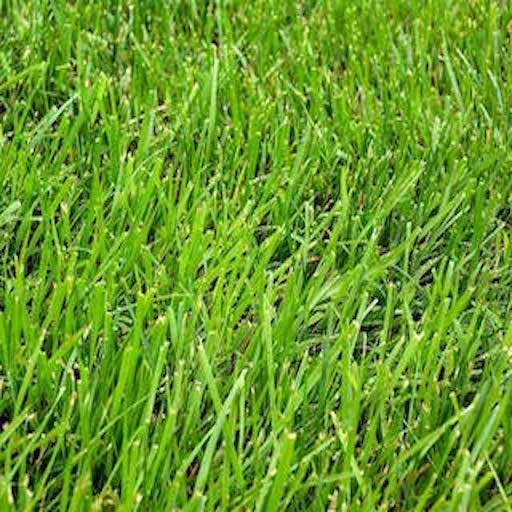 

# Original Image
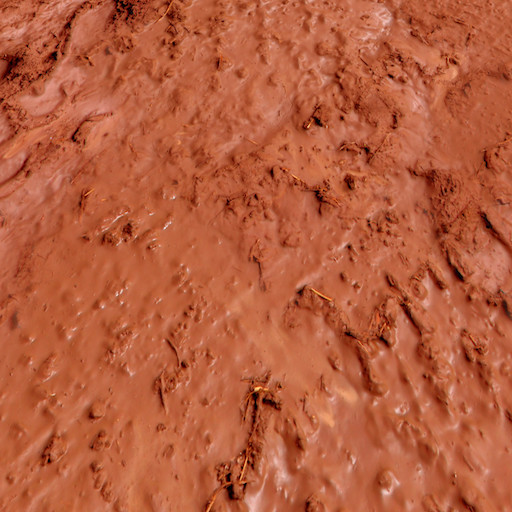

# Result Image
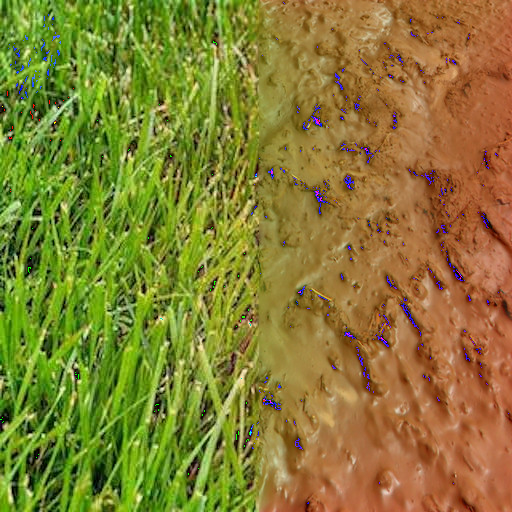

**SIFT - Scale Invariant Feature Transform**

Step 1 : Finding points of interest

*   For each scale, calculate multiple gaussian blurred images.
*   Then calculate the difference between each adjacent image to produce a DoG.
*   Find the local maxima or minima points as the points of interest.

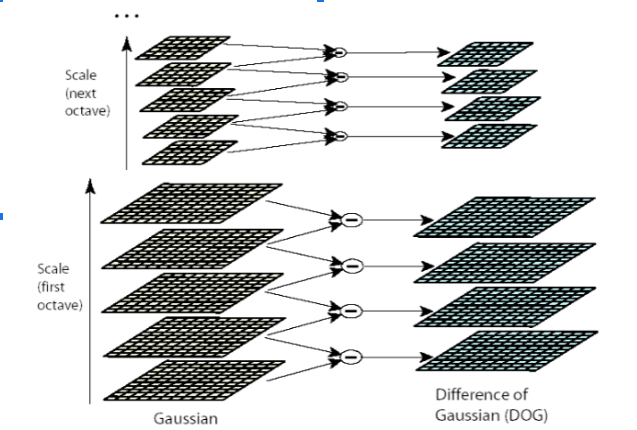      





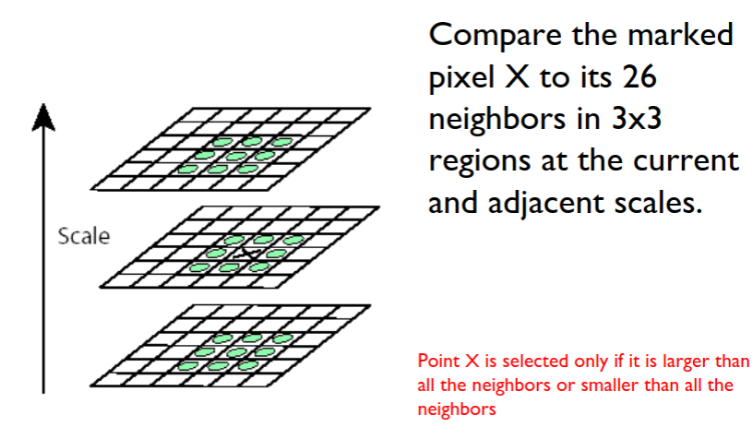

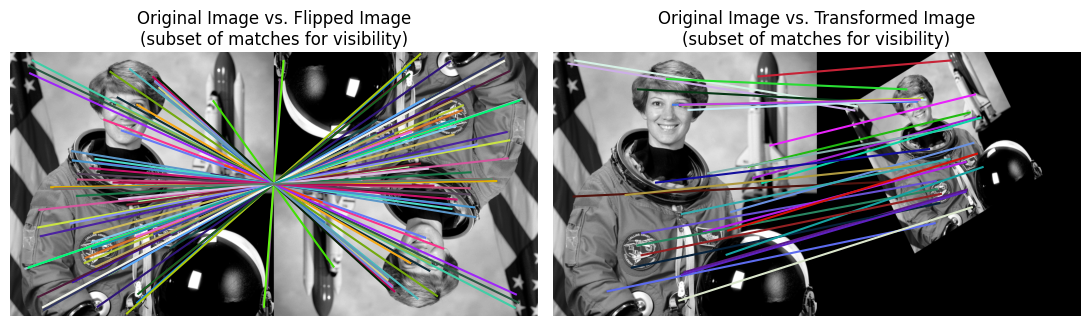

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import transform
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

img1 = rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)
tform = transform.AffineTransform(scale=(1.8, 1.6), rotation=0.5,
                                  translation=(0, -200))
img3 = transform.warp(img1, tform)

descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6,
                              cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, max_ratio=0.6,
                              cross_check=True)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 8))

plt.gray()

# plot_matches(ax[0, 0], img1, img2, keypoints1, keypoints2, matches12)
# ax[0, 0].axis('off')
# ax[0, 0].set_title("Original Image vs. Flipped Image\n"
#                    "(all keypoints and matches)")

# plot_matches(ax[1, 0], img1, img3, keypoints1, keypoints3, matches13)
# ax[1, 0].axis('off')
# ax[1, 0].set_title("Original Image vs. Transformed Image\n"
#                    "(all keypoints and matches)")

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12[::15],
             only_matches=True)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Flipped Image\n"
                   "(subset of matches for visibility)")

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13[::15],
             only_matches=True)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image\n"
                   "(subset of matches for visibility)")

plt.tight_layout()
plt.show()

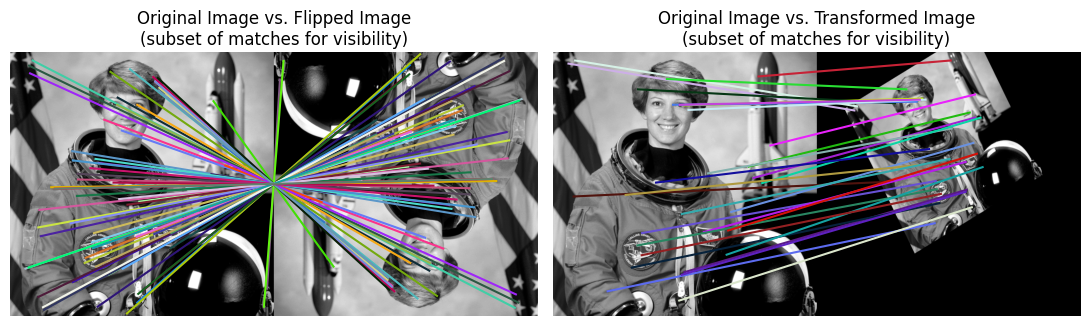

# Image Pyramid in Deep Learning

**FPN - Feature Pyramid Network**

Recognizing objects at vastly different scales is a fundamental challenge in computer vision.

Feature pyramids built upon image pyramids form the basis of a standard solution

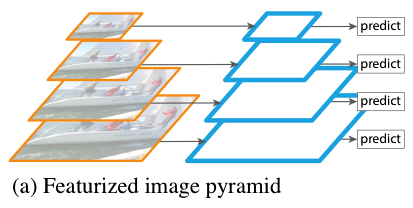

Using an image pyramid to build a feature pyramid.
Features are computed on each of the image scales independently,
which is very slow.

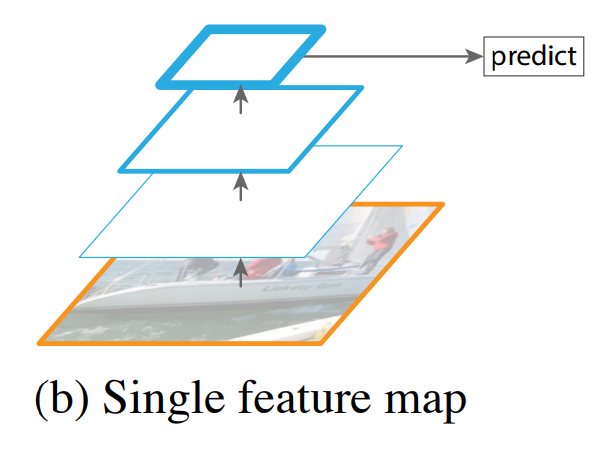


Recent detection systems have opted to use only single scale features for faster detection, but it might ignore small object information. Because the features of small-sized targets are rapidly lost with layer-by-layer downsampling, by the last layer there are very few features left to support accurate detection of small targets.

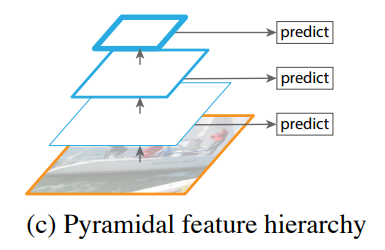

The structure adopted by SSD, which first proposed the idea of using Feature Map of different layers for detection. But SSD simply derives a prediction from each layer, it does not perform feature reuse between layers, so the improvement in the detection of small targets brought about is very limited.

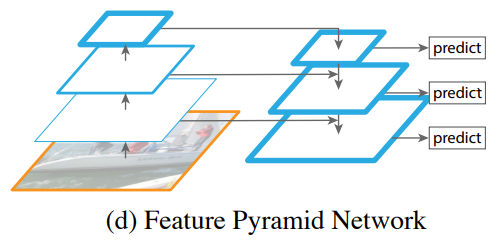

A new approach to feature fusion, proposed by Facebook AI Research (FAIR) in "Feature Pyramid Networks for Object Detection", improves accuracy while maintaining a balance of speed.

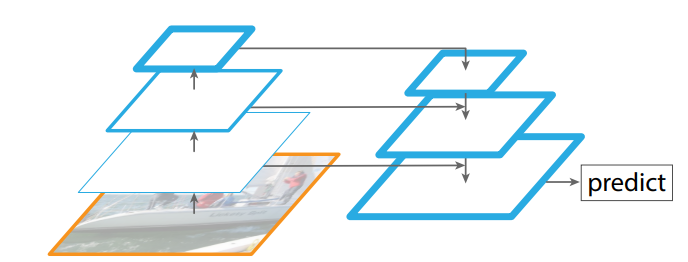

The structure adopted by U-net is similar to the overall structure of (d), but the prediction is made only at the last layer.

**YOLOv3**

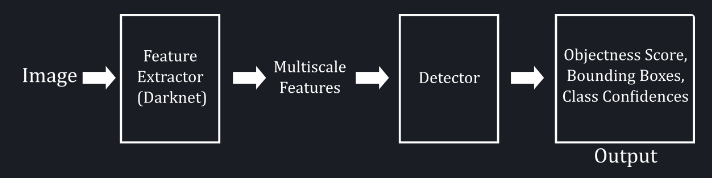

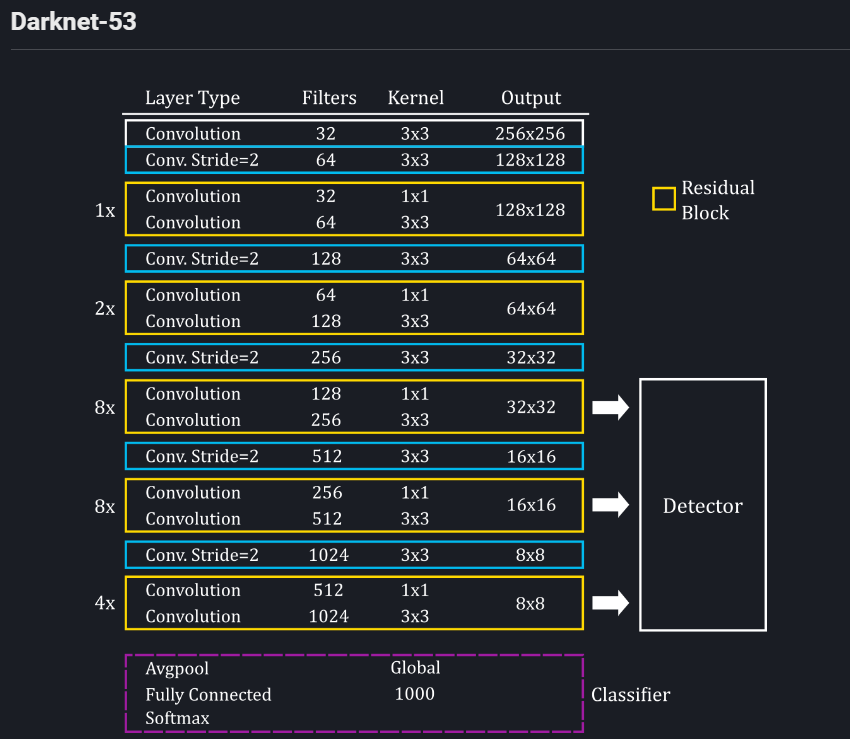

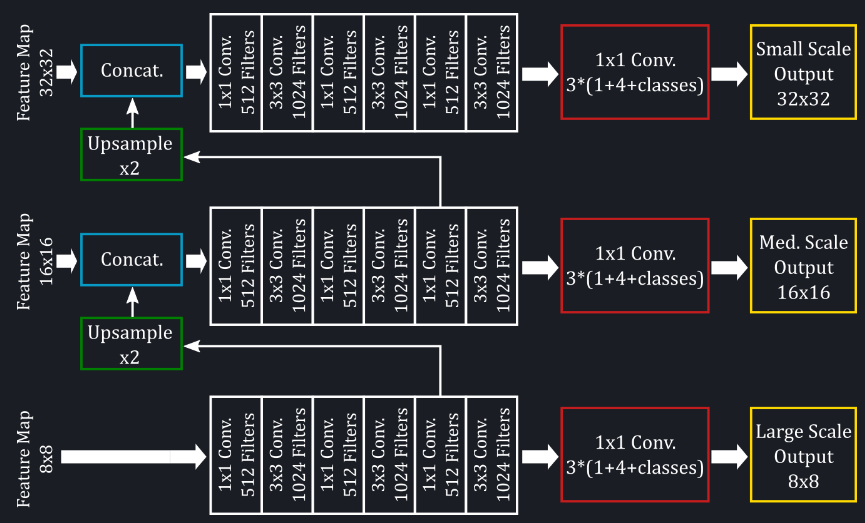

fatal: destination path 'darknet' already exists and is not an empty directory.
[Errno 20] Not a directory: 'darknet'
/content/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_openc

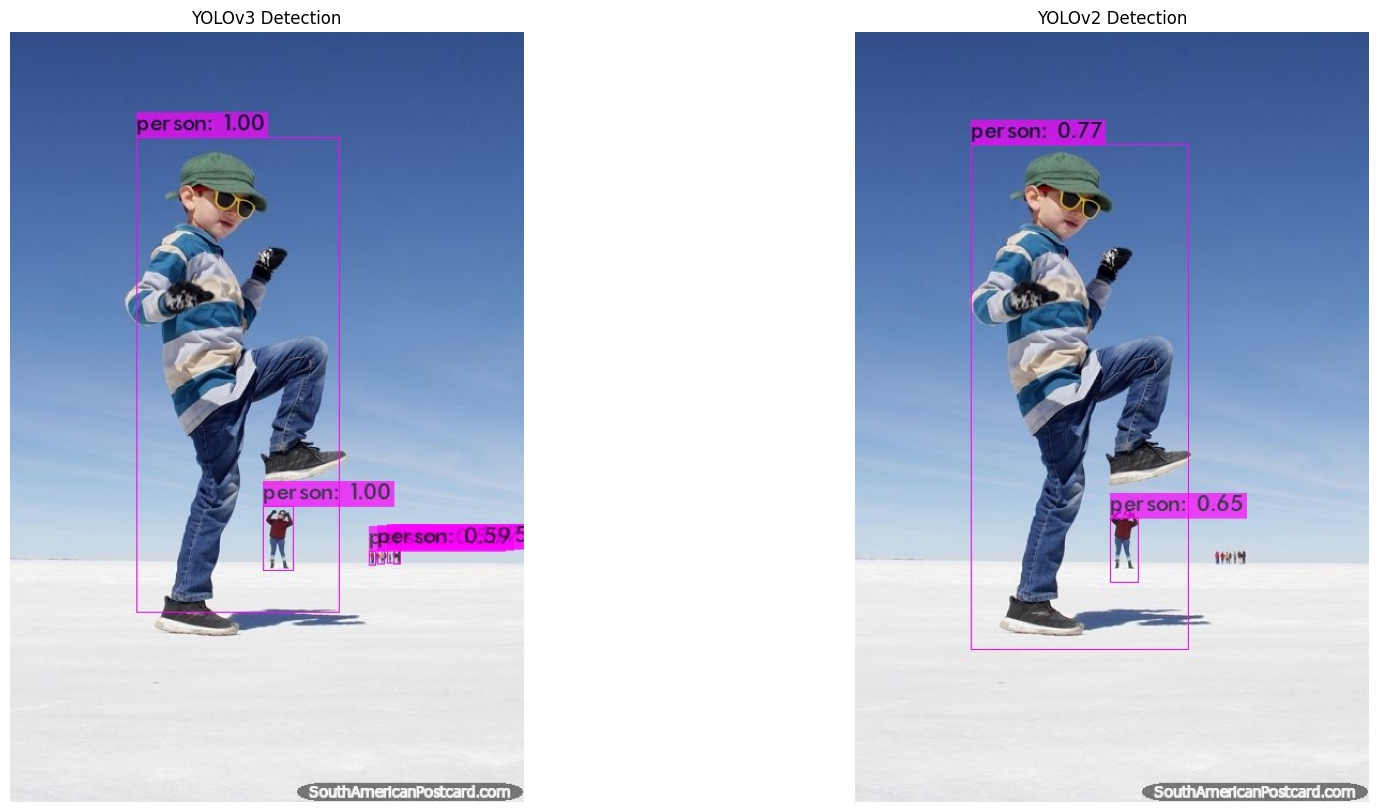

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!make

# Download the pre-trained weights for YOLOv3 and YOLOv2
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://pjreddie.com/media/files/yolov2.weights

import cv2
import subprocess
import matplotlib.pyplot as plt

# Function to perform detection
def detect_and_return_image(cfg, weights, image_path):
    command = f"./darknet detect {cfg} {weights} {image_path} -dont-show"
    !{command}
    image = cv2.imread('predictions.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    return image

# Load the pre-trained weights if not already done
!wget -nc https://pjreddie.com/media/files/yolov3.weights
!wget -nc https://pjreddie.com/media/files/yolov2.weights

# Assuming you have an image already in your workspace
image_path = '/content/bolivia-EAAS0224_trip7.jpg'  # Path to your image

# Perform detection with YOLOv3 and YOLOv2
image_yolov3 = detect_and_return_image('cfg/yolov3.cfg', 'yolov3.weights', image_path)
image_yolov2 = detect_and_return_image('cfg/yolov2.cfg', 'yolov2.weights', image_path)

# Create a figure to display the results
plt.figure(figsize=(20, 10))  # Set the figure size to be large enough for both images

# Display YOLOv3 result
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(image_yolov3)
plt.title('YOLOv3 Detection')
plt.axis('off')  # Turn off axis labels

# Display YOLOv2 result
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(image_yolov2)
plt.title('YOLOv2 Detection')
plt.axis('off')  # Turn off axis labels

plt.show()

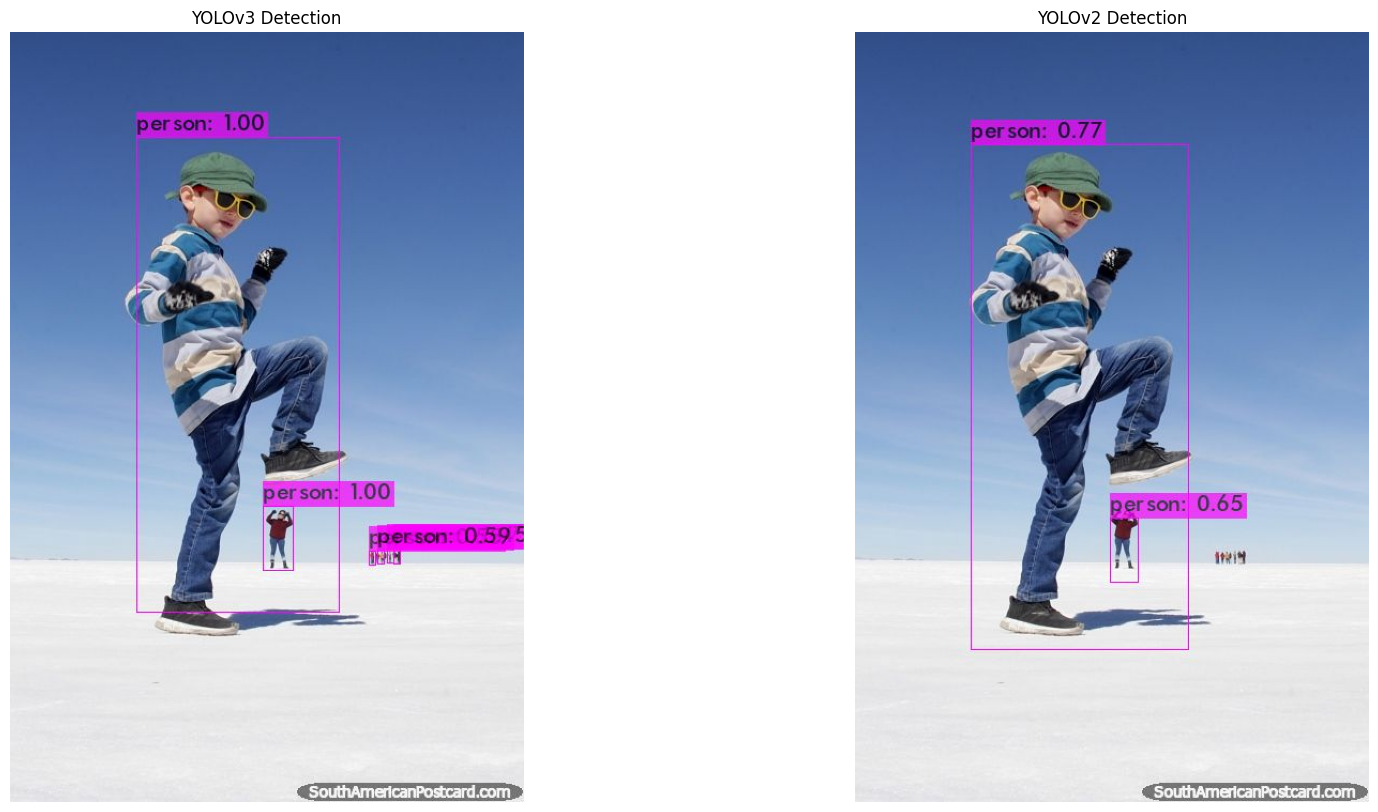

**PVT - Pyramid Vision Transformer**

PVT has several merits compared to current state
of the arts. 

(1) Different from ViT that typically yields low-
resolution outputs and incurs high computational and memory costs, PVT not only can be trained on dense partitions
of an image to achieve high output resolution, which is important for dense prediction, but also uses a progressive
shrinking pyramid to reduce the computations of large feature maps. 

(2) PVT inherits the advantages of both CNN and Transformer, making it a unified backbone for various vision tasks without convolutions, where it can be used
as a direct replacement for CNN backbones.



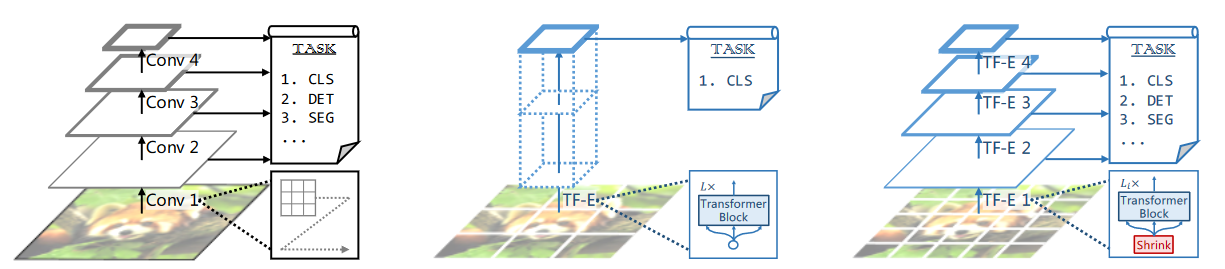

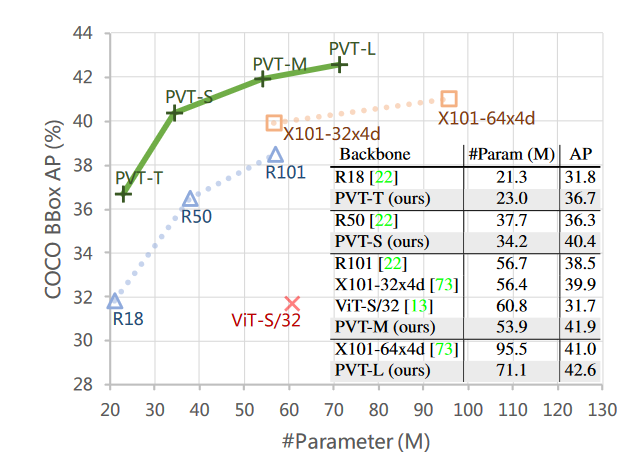

In [ ]:

!pip install datasets

Predicted class: traffic light, traffic signal, stoplight


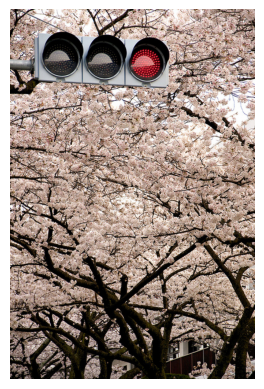

In [ ]:
from transformers import PvtImageProcessor, PvtForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt

url = 'http://images.cocodataset.org/val2017/000000015272.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = PvtImageProcessor.from_pretrained('Zetatech/pvt-tiny-224')
model = PvtForImageClassification.from_pretrained('Zetatech/pvt-tiny-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])
predicted_label = logits.argmax(-1).item()
plt.imshow(image)
plt.axis('off')
plt.show()

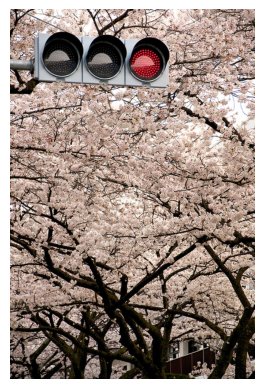

# Conclusion

Image pyramids are a crucial tool in computer vision, allowing for the
analysis and processing of images at multiple scales. By breaking down
images into simpler, smaller layers, they enhance the accuracy and
flexibility of tasks such as image enhancement and feature detection.
This technique is fundamental in a wide range of computer vision
applications, from image enhancement to feature detection.



# References


Dosovitskiy, Alexey, et al. "An image is worth 16x16 words: Transformers for image recognition at scale." arXiv preprint arXiv:2010.11929 (2020).

Lin, Tsung-Yi, et al. "Feature pyramid networks for object detection."
Proceedings of the IEEE conference on computer vision and pattern
recognition. 2017.

Lowe, David G. "Object recognition from local scale-invariant
features." Proceedings of the seventh IEEE international conference on
computer vision. Vol. 2. Ieee, 1999.

Redmon, Joseph, and Ali Farhadi. "Yolov3: An incremental improvement."
arXiv preprint arXiv:1804.02767 (2018).

Szeliski, Richard. Computer vision: algorithms and applications. Springer Nature, 2022.

Wang, Wenhai, et al. "Pyramid vision transformer: A versatile backbone for dense prediction without convolutions." Proceedings of the IEEE/CVF international conference on computer vision. 2021.